In [25]:
import numpy as np
import glob2
import matplotlib.pyplot as plt
import os
import json
import itertools
import pandas as pd
import seaborn as sns

In [159]:
# Four params and their values, each is a np array
queen_bee_concentrations = np.linspace(0.01, 0.5, 4)
worker_bee_concentrations = np.linspace(0.005, 0.5, 4)
diffusion_coefficients = np.linspace(0.05, 0.5, 4)
worker_bee_thresholds = np.linspace(0.001, 0.005, 4)

In [4]:
# Get names of the 256 json's
json_list = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*.json")))

In [160]:
def get_matching_filenames(json_list, param_1, param_2, value_1, value_2):
    matching_json_names = []
    for i in range(len(json_list)):
        if (json_list[i].find(param_1+str(value_1)) != -1) and (json_list[i].find(param_2+str(value_2)) != -1):
            matching_json_names.append(json_list[i])
    
    return matching_json_names

In [8]:
# # Test above function on 1 set of param pair values
# names = get_matching_filenames(json_list, "Q", "W", 0.01, 0.005)
# print(names)

In [9]:
def get_ending_distances(json_file):
    # Get the 10 ending values of a single json
    with open("avg_distance_data/" + json_file, "r") as f:
        data = json.load(f)
        # print(data)
        
    # For 1 JSON of 10 replicate swarms: going through its 10 lists
    dist_list = []
    for i in range(len(data)):
        ending_dist = data[i][-1]
        dist_list.append(ending_dist)
    return dist_list

In [13]:
def get_mean_var(json_list, param_1, param_2, value_1, value_2):

    # Load in a json list and get ending value of each list, then average and variance those 160 values
    
    param_pair_distances = []
    # print(len(param_pair_distances))
    # print(param_pair_distances[0])

    names = get_matching_filenames(json_list, param_1, param_2, value_1, value_2)

    for n in names:
        # print(n)
        distance_lists = get_ending_distances(n)
        param_pair_distances.append(distance_lists)

    # Merge lists in param_pair_distances
    merged = list(itertools.chain.from_iterable(param_pair_distances))
    # print(merged)
    merged_mean = np.mean(merged)
    # print(merged_mean)
    merged_var = np.var(merged)
    # print(merged_var)
    
    return merged_mean, merged_var

In [161]:
# Test above function
get_mean_var(json_list, "Q", "W", 0.5, 0.005)

(0.7079110334942815, 1.4247220398511948)

In [113]:
# Iterate through different pairs of params and their values

def compare_params(json_list, param_1, param_2, list_1, value_2):
    # Create one column for a W values against 4 queen values
    Q_means = []
    Q_variances = []
    for item in list_1:
        print(item)
        mean_var = get_mean_var(json_list, param_1, param_2, item, value_2)
        print(mean_var[0])
        Q_means.append(mean_var[0])
        Q_variances.append(mean_var[1]) 
    return Q_means, Q_variances

In [149]:
# # Test
# test_means = compare_params(json_list, "Q", "W", queen_bee_concentrations, 0.005)[0]
# test_variances = compare_params(json_list, "Q", "W", queen_bee_concentrations, 0.005)[1]
# test_means

In [80]:
# # Compare 4 Q values against each W value
# d_means = {}
# for j in worker_bee_concentrations:
#     for i in queen_bee_concentrations:
#         means = compare_params(json_list, "Q", "W", queen_bee_concentrations, j)[0]
#         #print(means)
#         d_means[i] = pd.Series(means, index=worker_bee_concentrations)
# d_means

## Write new function returning DF here

In [ ]:
def get_dataframe(param_1, list_1, param_2, list_2, mean_or_var):
    
    return 

In [91]:
vals_list = []
for val in worker_bee_concentrations:
    x = compare_params(json_list, "Q", "W", queen_bee_concentrations, val)[0]
    vals_list.append(x)
vals_list

[[1.8924136729503638,
  0.7196448231949988,
  0.7149058883422967,
  0.7079110334942815],
 [3.675502619614292,
  3.161416697244441,
  2.1519669434526287,
  1.6336494743494392],
 [3.694871417991803,
  3.5221055311540965,
  3.1262577829699665,
  2.5211131327335914],
 [3.663372718312124, 3.5686854445005145, 3.44988626107407, 2.9554224948941963]]

In [119]:
data = {}
for i, key in enumerate(worker_bee_concentrations):
    data[key] = vals_list[i]
    
data

{0.005: [1.8924136729503638,
  0.7196448231949988,
  0.7149058883422967,
  0.7079110334942815],
 0.17: [3.675502619614292,
  3.161416697244441,
  2.1519669434526287,
  1.6336494743494392],
 0.335: [3.694871417991803,
  3.5221055311540965,
  3.1262577829699665,
  2.5211131327335914],
 0.5: [3.663372718312124,
  3.5686854445005145,
  3.44988626107407,
  2.9554224948941963]}

In [136]:
df_means = pd.DataFrame(data, index=[0.01, 0.173, 0.337, 0.5])
df_means

,0.005,0.17,0.335,0.5
0.010,1.892414,3.675503,3.694871,3.663373
0.173,0.719645,3.161417,3.522106,3.568685
0.337,0.714906,2.151967,3.126258,3.449886
0.500,0.707911,1.633649,2.521113,2.955422


## Plotting heatmap from dataframe for a pair of params

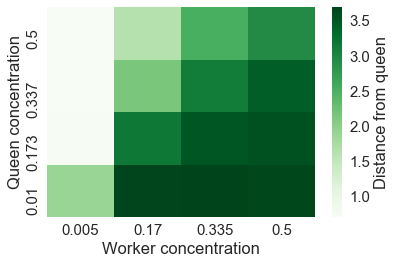

In [156]:
sns.set(font_scale = 1.5)
ax = sns.heatmap(df_means, cmap="Greens", cbar_kws={'label': 'Distance from queen'})
ax.invert_yaxis()
ax.set_ylabel('Queen concentration')
ax.set_xlabel('Worker concentration')
plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig('Queen_Worker.pdf')